In [1]:
import RGF_src as rgf
import numpy as np
import matplotlib.pyplot as plt

# Testing Green's functions 2dtb
Use this one instead of graphene to test the TB2D lattice

In [2]:
width=3
length=6
twist = False
k = 0
lead = 20


# set the relevant quantities
gramag = rgf.rgf()
gramag.set_2dtb_nanoribbon(width, length, twist, k, ander=0.0)


C = gramag.C
S = gramag.S



# Anderson = np.zeros([C,S])
# Anderson[2,2] = 10
# ander = 1
# Anderson = np.random.random([C,S])*ander
# gramag.Anderson = Anderson

    

gramag.build_spin()
gramag.build_vels_hsample()
gramag.generate_hamiltonian(lead, lead)

NL = gramag.NL
N = gramag.N
L = lead
R = lead



# list of complex energies
eta = 0.4
NE = 10
energies = np.linspace(0,1.0, NE)
zs = energies + eta*1j


# Testing the Green's functions graphene nanoribbon

In [13]:
width=3
length=6
twist = False
k = 0
lead = 12


# set the relevant quantities
gramag = rgf.rgf()
gramag.set_graphene_nanoribbon_rashba(width, length, twist, k, ander=1.0)


C = gramag.C
S = gramag.S
No = gramag.No



# Anderson = np.zeros([C,S])
# Anderson[2,2] = 10
ander = 1
Anderson = np.random.random([C,S])*ander
gramag.Anderson = Anderson

    

gramag.build_spin()
gramag.build_vels_hsample()
gramag.generate_hamiltonian(lead, lead)

NL = gramag.NL
N = gramag.N
L = lead
R = lead



# list of complex energies
eta = 0.4
NE = 10
energies = np.linspace(0,1.0, NE)
zs = energies + eta*1j


## Testing the surface Green's functions

In [4]:
# Left lead Hamiltonian
a = 0; b = C*L
HL = gramag.H[a:b,a:b]*1.0
print(HL.shape)

# Right lead Hamiltonian
c = C*(L+S); d = C*(L+S+R)
HR = gramag.H[c:d,c:d]*1.0
print(HR.shape)


(288, 288)
(288, 288)


In [5]:

g_surf_L_RGF, g_surf_R_RGF = gramag.build_surfaces(zs)


g_surf_L  = np.zeros([NE,C,C], dtype=complex) # Surface Green's function of the left lead G00
g_surf_R  = np.zeros([NE,C,C], dtype=complex) # Surface Green's function of the right lead G_{N+1,N+1}

for ee,z in enumerate(zs):
    print(ee, end=" ")
    # zn = np.conjugate(z)
    
    # Surface Green's function of left lead
    a=C*(L-1); b=C*L
    g_surf_L[ee,:,:] = np.linalg.inv(np.eye(L*C)*z - HL)[a:b,a:b]
    
    # Surface Green's function of the right lead
    a=0; b=C
    g_surf_R[ee,:,:] = np.linalg.inv(np.eye(R*C)*z - HR)[a:b,a:b]
    

0 1 2 3 4 5 6 7 8 9 

norm 2.781839487255512e-17
left surface


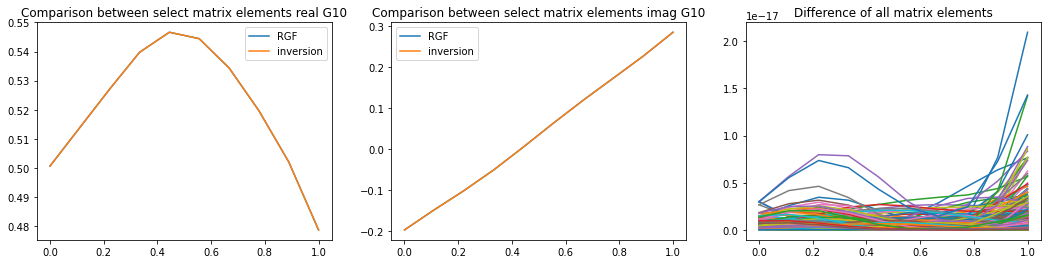

norm 2.7818395425926397e-17
right surface


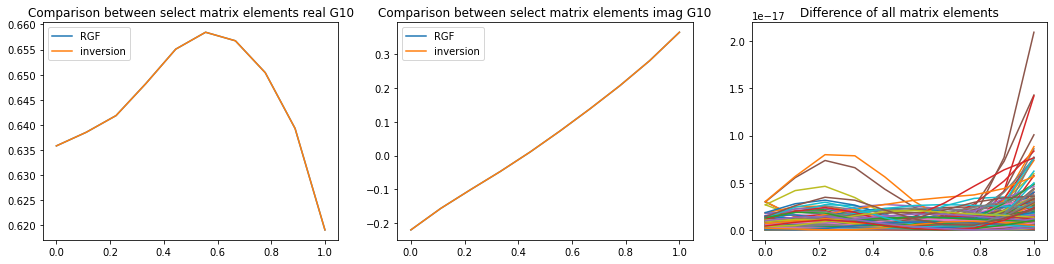

In [6]:

names = ["left surface", "right surface"]
for RGF, exact, name in zip([g_surf_L_RGF,g_surf_R_RGF],[g_surf_L,g_surf_R], names):
    
    dif = np.zeros([C,C,NE])
    for i in range(C):
        for j in range(C):
            dif[i,j,:] = abs(RGF[i,j,:] - exact[:,i,j])**2
    
    dE = energies[1] - energies[0]
    norm = dif.sum()*dE
    print("norm",norm*dE)

    print(name)
    fig, axs = plt.subplots(1,3,figsize=(18,4))
    i=1; j=0
    axs[0].set_title(f"Comparison between select matrix elements real G{i}{j}")
    axs[0].plot(energies,np.real(RGF[i,j,:]), label="RGF")
    axs[0].plot(energies,np.real(exact[:,i,j]), label="inversion")
    axs[0].legend()
    
    axs[1].set_title(f"Comparison between select matrix elements imag G{i}{j}")
    axs[1].plot(energies,np.imag(RGF[i,j,:]), label="RGF")
    axs[1].plot(energies,np.imag(exact[:,i,j]), label="inversion")
    axs[1].legend()
    
    for i in range(C):
        for j in range(C):
            p = np.real(dif[i,j,:])
            axs[2].plot(energies,p)
    axs[2].set_title("Difference of all matrix elements")
    
    plt.show()

## Testing surface left and right of a slice
These have to be identical to the leads if there is no disorder

In [7]:
# define slice
n = 2

# Hamiltonian left of slice
c = 0; d = C*(n+L); NL_slice = d-c
HL_slice = gramag.H[c:d,c:d]*1.0
print(HL_slice.shape)

# Hamiltonian right of slice
c = C*(n+L+1); d = N; NR_slice = d-c
HR_slice = gramag.H[c:d,c:d]*1.0
print(HR_slice.shape)

(336, 336)
(360, 360)


In [8]:

g_surf_Lslice  = np.zeros([NE,C,C], dtype=complex)
g_surf_Rslice  = np.zeros([NE,C,C], dtype=complex)


for ee,z in enumerate(zs):
    print(ee, end=" ")
    zn = np.conjugate(z)
    
    
    # Surface Green's function of left of slice
    a=C*(n+L-1); b=C*(n+L)
    g_surf_Lslice[ee,:,:] = np.linalg.inv(np.eye(NL_slice)*z - HL_slice)[a:b,a:b]
    
    # Surface Green's function of the right of slice
    a=0; b=C
    g_surf_Rslice[ee,:,:] = np.linalg.inv(np.eye(NR_slice)*z - HR_slice)[a:b,a:b]
    

0 1 2 3 4 5 6 7 8 9 

In [9]:
GL = gramag.build_surface_GL(zs, n)
GR = gramag.build_surface_GR(zs, n)

norm 2.4192415221099292e-20
left surface


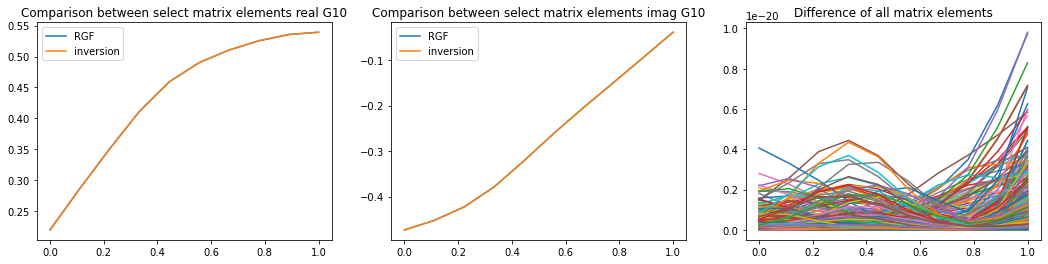

norm 6.781953850106909e-22
right surface


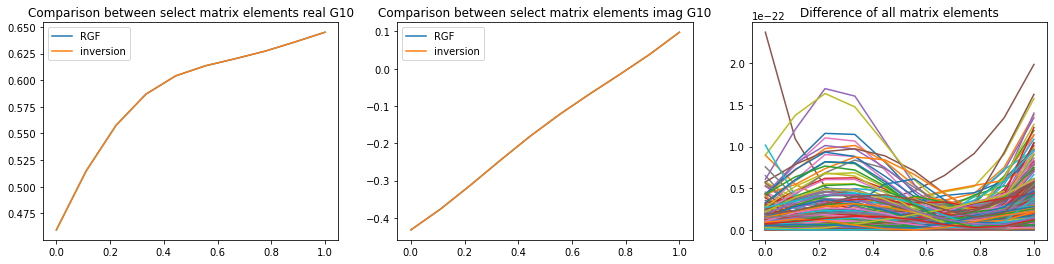

In [10]:

names = ["left surface", "right surface"]
for RGF, exact, name in zip([GL,GR],[g_surf_Lslice,g_surf_Rslice], names):
    
    dif = np.zeros([C,C,NE])
    for i in range(C):
        for j in range(C):
            dif[i,j,:] = abs(RGF[i,j,:] - exact[:,i,j])**2
    
    dE = energies[1] - energies[0]
    norm = dif.sum()*dE
    print("norm",norm*dE)

    print(name)
    fig, axs = plt.subplots(1,3,figsize=(18,4))
    i=1; j=0
    axs[0].set_title(f"Comparison between select matrix elements real G{i}{j}")
    axs[0].plot(energies,np.real(RGF[i,j,:]), label="RGF")
    axs[0].plot(energies,np.real(exact[:,i,j]), label="inversion")
    axs[0].legend()
    
    axs[1].set_title(f"Comparison between select matrix elements imag G{i}{j}")
    axs[1].plot(energies,np.imag(RGF[i,j,:]), label="RGF")
    axs[1].plot(energies,np.imag(exact[:,i,j]), label="inversion")
    axs[1].legend()
    
    for i in range(C):
        for j in range(C):
            p = np.real(dif[i,j,:])
            axs[2].plot(energies,p)
    axs[2].set_title("Difference of all matrix elements")
    
    plt.show()

## Testing the surface with drop

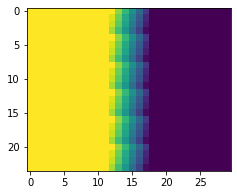

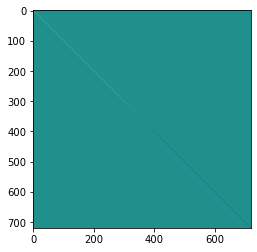

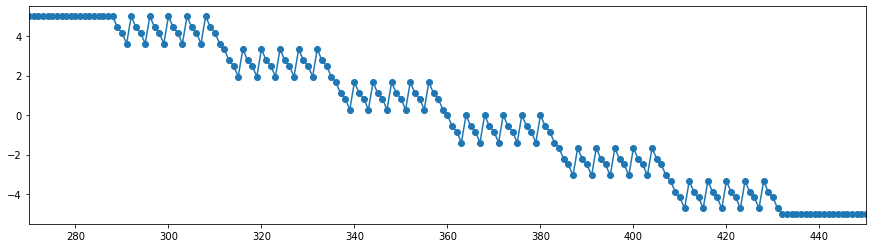

In [14]:
dV = 10
size = length*gramag.prim[0][0]

drop = np.zeros([NL, C])
drop[:L,:] = dV/2
drop[L+S:,:] = -dV/2

drop[L:L+S,:] = dV*(1.0-2*gramag.X/size)/2

fig, axs = plt.subplots(1,1,figsize=(10,3))
plt.imshow(drop.transpose())
plt.show()

dropmat = np.zeros([N,N], dtype=complex)
for i in range(NL):
    for j in range(width):
        for oo in range(No):
            m = j*No + oo
            n = i*C + m
            dropmat[n,n] = drop[i,m]

            
plt.imshow(np.real(dropmat))
plt.show()

fig, axs = plt.subplots(1,1,figsize=(15,4))
axs.plot(np.real(np.diag(dropmat)),'o-')
axs.set_xlim([270,450])
plt.show()


In [15]:
H = gramag.H + dropmat

green_inv    = np.zeros([NE,N,N], dtype=complex)

for ee,z in enumerate(zs):
    print(ee, end=" ")
    zn = np.conjugate(z)
    
    # Complete Green's function
    green_inv[ee,:,:]   = np.linalg.inv(np.eye(N)*z - H)
    
    

0 1 2 3 4 5 6 7 8 9 

In [16]:
# extract the correct slice from the green's function
n = 1
a = (n+L)*C
b = (n+1+L)*C
exact = green_inv[:,a:b,a:b]

RGF = gramag.get_Gnn_drop(zs,n,dV)

norm 5.225180682412603e-07


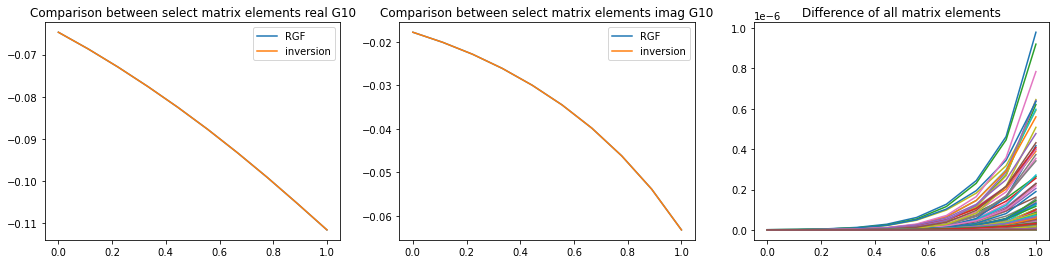

In [17]:

dif = np.zeros([C,C,NE])
for i in range(C):
    for j in range(C):
        dif[i,j,:] = abs(RGF[i,j,:] - exact[:,i,j])**2

dE = energies[1] - energies[0]
norm = dif.sum()*dE
print("norm",norm*dE)


fig, axs = plt.subplots(1,3,figsize=(18,4))
i=1; j=0
axs[0].set_title(f"Comparison between select matrix elements real G{i}{j}")
axs[0].plot(energies,np.real(RGF[i,j,:]), label="RGF")
axs[0].plot(energies,np.real(exact[:,i,j]), label="inversion")
axs[0].legend()

axs[1].set_title(f"Comparison between select matrix elements imag G{i}{j}")
axs[1].plot(energies,np.imag(RGF[i,j,:]), label="RGF")
axs[1].plot(energies,np.imag(exact[:,i,j]), label="inversion")
axs[1].legend()

for i in range(C):
    for j in range(C):
        p = np.real(dif[i,j,:])
        axs[2].plot(energies,p)
axs[2].set_title("Difference of all matrix elements")
plt.show()

## Testing the local Green's function

In [11]:
H = gramag.H

green_inv    = np.zeros([NE,N,N], dtype=complex)

for ee,z in enumerate(zs):
    print(ee, end=" ")
    zn = np.conjugate(z)
    
    # Complete Green's function
    green_inv[ee,:,:]   = np.linalg.inv(np.eye(N)*z - H)
    
    

0 1 2 3 4 5 6 7 8 9 

In [12]:
# extract the correct slice from the green's function
a = (n+L)*C
b = (n+1+L)*C
exact = green_inv[:,a:b,a:b]

Gn = gramag.get_Gnn(zs,n)
RGF = Gn*1.0

norm 4.168942404606842e-22


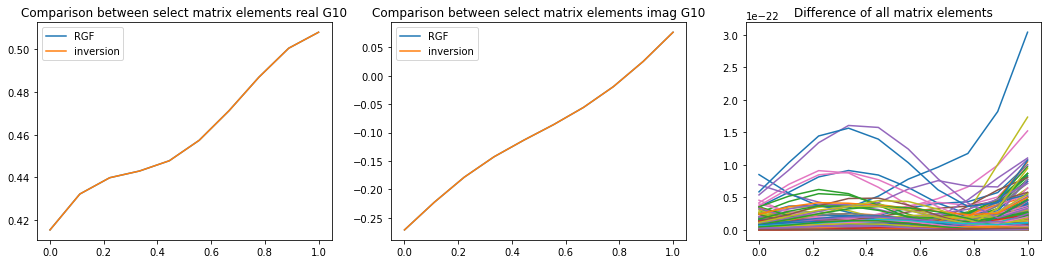

In [13]:


dif = np.zeros([C,C,NE])
for i in range(C):
    for j in range(C):
        dif[i,j,:] = abs(RGF[i,j,:] - exact[:,i,j])**2

dE = energies[1] - energies[0]
norm = dif.sum()*dE
print("norm",norm*dE)


fig, axs = plt.subplots(1,3,figsize=(18,4))
i=1; j=0
axs[0].set_title(f"Comparison between select matrix elements real G{i}{j}")
axs[0].plot(energies,np.real(RGF[i,j,:]), label="RGF")
axs[0].plot(energies,np.real(exact[:,i,j]), label="inversion")
axs[0].legend()

axs[1].set_title(f"Comparison between select matrix elements imag G{i}{j}")
axs[1].plot(energies,np.imag(RGF[i,j,:]), label="RGF")
axs[1].plot(energies,np.imag(exact[:,i,j]), label="inversion")
axs[1].legend()

for i in range(C):
    for j in range(C):
        p = np.real(dif[i,j,:])
        axs[2].plot(energies,p)
axs[2].set_title("Difference of all matrix elements")
plt.show()

## Testing G_0n

In [14]:
H = gramag.H
n = 2

green_inv    = np.zeros([NE,N,N], dtype=complex)

for ee,z in enumerate(zs):
    print(ee, end=" ")
    zn = np.conjugate(z)
    
    # Complete Green's function
    green_inv[ee,:,:]   = np.linalg.inv(np.eye(N)*z - H)
    
    

0 1 2 3 4 5 6 7 8 9 

In [15]:
G0n = gramag.get_G0n(zs, n)
RGF = G0n*1.0

i1 = C*(L-1)
i2 = C*(L)
j1 = C*(L+n)
j2 = C*(L+n+1)

exact = green_inv[:,i1:i2, j1:j2]

norm 8.70951403263705e-20


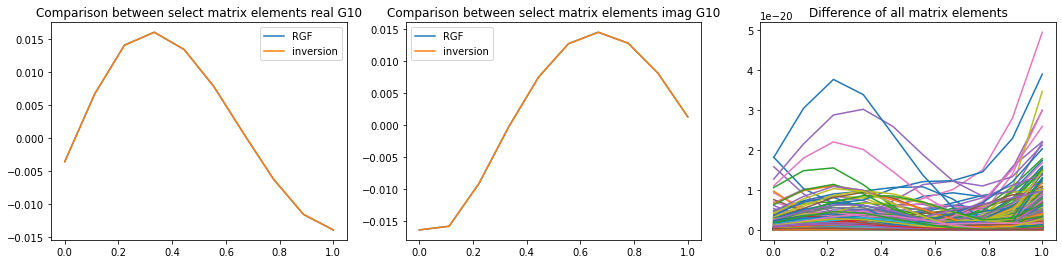

In [16]:

dif = np.zeros([C,C,NE])
for i in range(C):
    for j in range(C):
        dif[i,j,:] = abs(RGF[i,j,:] - exact[:,i,j])**2

dE = energies[1] - energies[0]
norm = dif.sum()*dE
print("norm",norm*dE)


fig, axs = plt.subplots(1,3,figsize=(18,4))
i=1; j=0
axs[0].set_title(f"Comparison between select matrix elements real G{i}{j}")
axs[0].plot(energies,np.real(RGF[i,j,:]), label="RGF")
axs[0].plot(energies,np.real(exact[:,i,j]), label="inversion")
axs[0].legend()

axs[1].set_title(f"Comparison between select matrix elements imag G{i}{j}")
axs[1].plot(energies,np.imag(RGF[i,j,:]), label="RGF")
axs[1].plot(energies,np.imag(exact[:,i,j]), label="inversion")
axs[1].legend()

for i in range(C):
    for j in range(C):
        p = np.real(dif[i,j,:])
        axs[2].plot(energies,p)
axs[2].set_title("Difference of all matrix elements")
plt.show()

## Testing G_n,N+1

In [17]:
H = gramag.H


green_inv    = np.zeros([NE,N,N], dtype=complex)

for ee,z in enumerate(zs):
    print(ee, end=" ")
    zn = np.conjugate(z)
    
    # Complete Green's function
    green_inv[ee,:,:]   = np.linalg.inv(np.eye(N)*z - H)
    
    

0 1 2 3 4 5 6 7 8 9 

In [18]:
n = 2

GnN = gramag.get_GnNp1(zs, n)
RGF = GnN*1.0

i1 = C*(L+n)
i2 = C*(L+n+1)
j1 = C*(L+S)
j2 = C*(L+S+1)


exact = green_inv[:,i1:i2, j1:j2]

norm 1.519916739448937e-20


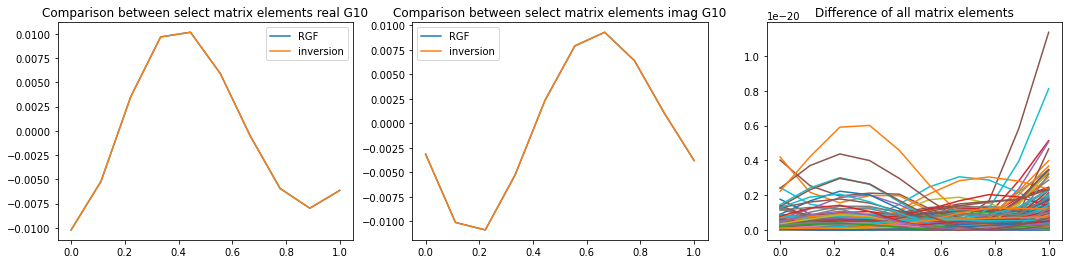

In [19]:

dif = np.zeros([C,C,NE])
for i in range(C):
    for j in range(C):
        dif[i,j,:] = abs(RGF[i,j,:] - exact[:,i,j])**2

dE = energies[1] - energies[0]
norm = dif.sum()*dE
print("norm",norm*dE)


fig, axs = plt.subplots(1,3,figsize=(18,4))
i=1; j=0
axs[0].set_title(f"Comparison between select matrix elements real G{i}{j}")
axs[0].plot(energies,np.real(RGF[i,j,:]), label="RGF")
axs[0].plot(energies,np.real(exact[:,i,j]), label="inversion")
axs[0].legend()

axs[1].set_title(f"Comparison between select matrix elements imag G{i}{j}")
axs[1].plot(energies,np.imag(RGF[i,j,:]), label="RGF")
axs[1].plot(energies,np.imag(exact[:,i,j]), label="inversion")
axs[1].legend()

for i in range(C):
    for j in range(C):
        p = np.real(dif[i,j,:])
        axs[2].plot(energies,p)
axs[2].set_title("Difference of all matrix elements")
plt.show()

## Testing the right and left complete sweep

In [20]:

# Testing the sweep from left to right
# e = C*(L+S)
# H_sweep_LR = H[0:e,0:e]*1.0

# e = C*L
# H_sweep_RL = H[e:,e:]*1.0


## Testing a second way to get the surface Green's function

In [21]:
n = 5

G = gramag.get_green_large(zs)
Gnn = gramag.get_Gnn(zs,n)

a = n*C
b = (n+1)*C
Gslice = G[a:b,a:b,:]

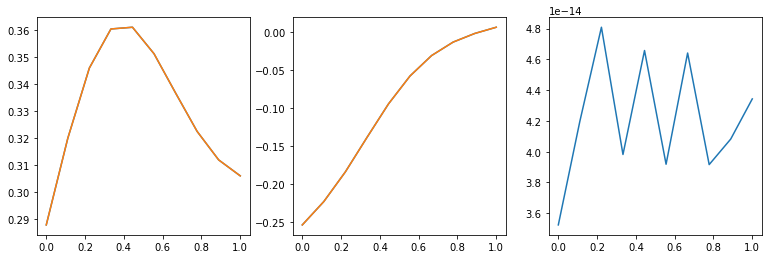

In [22]:
i=1; j=2
fig, axs = plt.subplots(1,3,figsize=(13,4))
axs[0].plot(energies, np.real(Gnn[i,j,:]))
axs[0].plot(energies, np.real(Gslice[i,j,:]))

axs[1].plot(energies, np.imag(Gnn[i,j,:]))
axs[1].plot(energies, np.imag(Gslice[i,j,:]))

dif = np.abs(Gnn - Gslice).sum(axis=0).sum(axis=0)
axs[2].plot(energies, dif)
plt.show()

## More thorough test

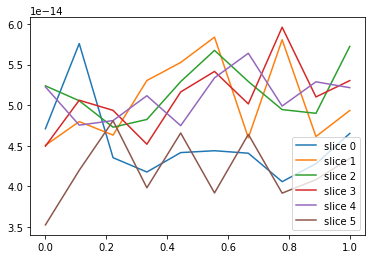

In [23]:
G = gramag.get_green_large(zs)
dif = np.zeros([NE,length])
for n in range(length):
    Gnn = gramag.get_Gnn(zs,n)
    a = n*C
    b = (n+1)*C
    Gslice = G[a:b,a:b,:]
    
    dif[:,n] = np.abs(Gnn - Gslice).sum(axis=0).sum(axis=0)
    
for n in range(length):
    plt.plot(energies, dif[:,n], label=f"slice {n}")
plt.legend()
plt.show()

# Testing convergence

In [ ]:
etas = np.array([0.1**i for i in range(10)])
Netas = len(etas)
niter = 60
convs = np.zeros([Netas, niter])

for j, eta in enumerate(etas):
    z = 1.8 + eta*1j
    
    conv = gramag.build_surface_green_right(z, niter=niter)*1.0
    # conv1 = np.abs(conv).sum(axis=0).sum(axis=0)
    conv1 = np.imag(conv[0,1,:])
    convs[j,:] = conv1
    
fig, axs = plt.subplots(1,3,figsize=(15,4))
for i in range(Netas):
    axs[0].plot(convs[i,:])
    axs[1].plot(convs[i,-10:] - convs[i,-1])

axs[2].plot(etas, convs[:,-1],'o-')
axs[2].set_xscale('log')
plt.show()